### Connect to Gdrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, log_loss
import matplotlib.pyplot as plt

## 1. Data Extraction

**Extract Data**

In [ ]:
batch1213_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1213-data-GRADED.xlsx',
                             skiprows=5)
batch1213_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1213-data-GRADED.xlsx',
                                           skiprows=4, sheet_name='preuni')
batch1213_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1213-data-GRADED.xlsx',
                                           skiprows=2, sheet_name='pro1')

batch1314_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1314-data-GRADED.xlsx',
                             skiprows=5)
batch1314_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1314-data-GRADED.xlsx',
                                           skiprows=4, sheet_name='preuni')
batch1314_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1314-data-GRADED.xlsx',
                                           skiprows=5, sheet_name='pro1')

batch1415_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1415-data-GRADED.xlsx',
                             skiprows=5)
batch1415_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1415-data-GRADED.xlsx',
                                           skiprows=4, sheet_name= 'preuni')
batch1415_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1415-data-GRADED.xlsx',
                                           skiprows=2, sheet_name= 'pro1')

batch1516_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1516-data-graded.xlsx',
                             skiprows=5)
batch1516_preuniversity_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1516-data-graded.xlsx',
                                           skiprows=4, sheet_name='preuni')
batch1516_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1516-data-graded.xlsx',
                                           skiprows=2, sheet_name='pro1')

batch1617_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1617-data-GRADED.xlsx',
                             skiprows=5)
batch1617_preuniversity_df= pd.read_excel ('//content/drive/MyDrive/AI_education/data/batch1617-data-GRADED.xlsx',
                                           skiprows=5, sheet_name= 'preuni')
batch1617_professional1_df= pd.read_excel ('/content/drive/MyDrive/AI_education/data/batch1617-data-GRADED.xlsx',
                                           skiprows=5, sheet_name= 'pro1')


In [ ]:
batch1213_part1_df = pd.merge(batch1213_df,
                              batch1213_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")
batch1213_part2_df = batch1213_professional1_df
batch1213_all_df = pd.merge(batch1213_part1_df,
                               batch1213_part2_df,
                               on = "STUDENT'S IDENTITY NO. ")


batch1314_part1_df = pd.merge(batch1314_df,
                              batch1314_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")
batch1314_part2_df = batch1314_professional1_df

batch1314_all_df = pd.merge(batch1314_part1_df,
                               batch1314_part2_df,
                               on = "STUDENT'S IDENTITY NO. ")


batch1415_part1_df = pd.merge(batch1415_df,
                              batch1415_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")
batch1415_part2_df = batch1415_professional1_df

batch1415_all_df = pd.merge(batch1415_part1_df,
                            batch1415_part2_df,
                            on = "STUDENT'S IDENTITY NO. ")


batch1516_part1_df = pd.merge(batch1516_df,
                              batch1516_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")
batch1516_part2_df = batch1516_professional1_df

batch1516_all_df = pd.merge(batch1516_part1_df,
                            batch1516_part2_df,
                            on = "STUDENT'S IDENTITY NO. ")


batch1617_part1_df = pd.merge(batch1617_df,
                              batch1617_preuniversity_df,
                              on = "STUDENT'S IDENTITY NO. ")

batch1617_part2_df = batch1617_professional1_df

batch1617_all_df = pd.merge(batch1617_part1_df,
                            batch1617_part2_df,
                            on = "STUDENT'S IDENTITY NO. ")



## 2. Data Preparation

**Combine Preprocessed Data**

In [ ]:
data_df = pd.concat([batch1213_all_df, batch1314_all_df, batch1415_all_df, batch1516_all_df, batch1617_all_df])
data_df.head()

,NO._x,STUDENT'S IDENTITY NO.,LAST DIGIT MATRIC NO.,GENDER,AGE DURING ADMISSION,BIRTH DATE,MIDDLE IC NO.,DISTRICT,POSCODE,STATE,...,SEM 6,ORAL BIOLOGY RESIT,RESIT STATUS,SEM 4,ANATOMY RESIT,PHYSIOLOGY RESIT,RESIT STATUS.1,BIOCHEMISTRY RESIT,RESIT STATUS.2,RESIT STATUS.3
0,1,11-12-10,7,MALE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,12-13-01,8,FEMALE,21.0,911122,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,12-13-02,6,FEMALE,20.0,920816,3.0,BACHOK,16370,KELANTAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12-13-03,6,FEMALE,20.0,920522,6.0,JERANTUT,27020,PAHANG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,12-13-04,4,FEMALE,20.0,920625,8.0,PUCHONG,47100,SELANGOR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 58
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NO._x                    285 non-null    int64  
 1   STUDENT'S IDENTITY NO.   285 non-null    object 
 2   LAST DIGIT MATRIC NO.    285 non-null    int64  
 3   GENDER                   285 non-null    object 
 4   AGE DURING ADMISSION     278 non-null    float64
 5   BIRTH DATE               220 non-null    object 
 6   MIDDLE IC NO.            59 non-null     float64
 7   DISTRICT                 277 non-null    object 
 8   POSCODE                  268 non-null    object 
 9   STATE                    279 non-null    object 
 10  COUNTRY                  281 non-null    object 
 11  NO._y                    285 non-null    int64  
 12  PRE-UNIVERSITY           264 non-null    object 
 13   SEM 1                   258 non-null    float64
 14  SEM 2                    258 non

In [ ]:
df_copy = data_df.copy()

**Cek missing value**

In [ ]:
df_copy.isnull().sum()

NO._x                        0
STUDENT'S IDENTITY NO.       0
LAST DIGIT MATRIC NO.        0
GENDER                       0
AGE DURING ADMISSION         7
BIRTH DATE                  65
MIDDLE IC NO.              226
DISTRICT                     8
POSCODE                     17
STATE                        6
COUNTRY                      4
NO._y                        0
PRE-UNIVERSITY              21
 SEM 1                      27
SEM 2                       27
SEM 3                       27
SEM 4                       94
SEM 5                      158
TOTAL_SEM                   27
AVERAGE_CGPA                27
FINAL_CGPA                  27
NO.                          0
ANATOMY MARK                 0
GRADING                      0
ANATOMY STATUS               0
PHYSIOLOGY MARK              0
GRADING.1                    0
PHYSIOLOGY STATUS            0
BIOCHEMISTRY MARK            0
GRADING.2                    0
BIOCHEMISTRY STATUS          0
ORAL BIOLOGY MARK            0
GRADING.

**Remove unncessary variables**

In [ ]:
df_copy = df_copy.drop(['RESIT STATUS.3', 'RESIT STATUS.1','PHYSIOLOGY RESIT','ORAL BIOLOGY RESIT','RESIT STATUS.2','BIOCHEMISTRY RESIT','SEM 6',
              'ANATOMY RESIT','RESIT STATUS','BIRTH DATE','SEM 4','MIDDLE IC NO.','SEM 5',' SEM 4', ' BIRTH DATE', 'NO._x', 'LAST DIGIT MATRIC NO.', 'NO._y', 'NO.','DISTRICT', 'STATE', 'COUNTRY','PRE-UNIVERSITY','ANATOMY STATUS','PHYSIOLOGY STATUS',
         'ORAL BIOLOGY STATUS', 'BIOCHEMISTRY STATUS'], axis=1)

In [ ]:
df_copy = df_copy.drop(['GENDER', 'POSCODE', ' SEM 1', 'SEM 2', 'SEM 3', 'ANATOMY MARK', 'PHYSIOLOGY MARK', 'GRADING.1', 'BIOCHEMISTRY MARK', 'GRADING.2', 'ORAL BIOLOGY MARK', 'GRADING.3', 'MIDDLE I/C NO.'], axis=1)

In [ ]:
df_copy = df_copy.drop("STUDENT'S IDENTITY NO. ", axis=1)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AGE DURING ADMISSION  278 non-null    float64
 1   TOTAL_SEM             258 non-null    float64
 2   AVERAGE_CGPA          258 non-null    float64
 3   FINAL_CGPA            258 non-null    float64
 4   GRADING               285 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.4+ KB


**Handling Missing values**

In [ ]:
df_copy.isnull().sum()

AGE DURING ADMISSION     7
TOTAL_SEM               27
AVERAGE_CGPA            27
FINAL_CGPA              27
GRADING                  0
dtype: int64

In [ ]:
df_data = df_copy.dropna()

In [ ]:
df_data.isnull().sum()

AGE DURING ADMISSION    0
TOTAL_SEM               0
AVERAGE_CGPA            0
FINAL_CGPA              0
GRADING                 0
dtype: int64

In [ ]:
df_data.head()

,AGE DURING ADMISSION,TOTAL_SEM,AVERAGE_CGPA,FINAL_CGPA,GRADING
1,21.0,4.0,3.4825,3.63,C
2,20.0,5.0,3.6980,3.72,C
3,20.0,5.0,3.4600,3.60,C
4,20.0,5.0,3.6820,3.79,C
5,20.0,5.0,3.5260,3.68,B


## Split Data

In [ ]:
x = df_data.drop("GRADING", axis =1)
y = df_data['GRADING']
x = x.values
x

array([[21.        ,  4.        ,  3.4825    ,  3.63      ],
       [20.        ,  5.        ,  3.698     ,  3.72      ],
       [20.        ,  5.        ,  3.46      ,  3.6       ],
       ...,
       [20.        ,  5.        ,  4.        ,  4.        ],
       [20.        ,  5.        ,  3.514     ,  3.51      ],
       [19.        ,  3.        ,  3.68333333,  3.66      ]])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=2022)

**Divide the data into train and test data**

In [ ]:
y_train.value_counts()

GRADING
B    82
C    50
A    12
F    10
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

GRADING
B    46
C    41
F    11
A     6
Name: count, dtype: int64

**Handle imbalanced data using resampling method**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2022)
x_train, y_train = sm.fit_resample(x_train, y_train)

y_train.value_counts()

GRADING
B    82
C    82
F    82
A    82
Name: count, dtype: int64

## Modeling

### 4.1 Logistic Regression

In [ ]:
# Model Development
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred = log_reg.predict(x_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           A       0.52      0.62      0.56        82
           B       0.41      0.48      0.44        82
           C       0.39      0.27      0.32        82
           F       0.42      0.40      0.41        82

    accuracy                           0.44       328
   macro avg       0.43      0.44      0.43       328
weighted avg       0.43      0.44      0.43       328

[[51 20  5  6]
 [23 39 13  7]
 [10 18 22 32]
 [15 17 17 33]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_pred = log_reg.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.05      0.17      0.07         6
           B       0.47      0.48      0.47        46
           C       0.60      0.29      0.39        41
           F       0.07      0.09      0.08        11

    accuracy                           0.35       104
   macro avg       0.30      0.26      0.25       104
weighted avg       0.45      0.35      0.38       104

[[ 1  4  0  1]
 [15 22  4  5]
 [ 5 16 12  8]
 [ 1  5  4  1]]


False Positive Rate for each class: [0.21428571 0.43103448 0.12698413 0.15053763]
Macro-average FPR: 0.23071048960926602
Micro-average FPR: 0.21794871794871795
Weighted-average FPR: 0.26899580459091027
Logarithmic Loss on Test Set: 1.3229777843748434


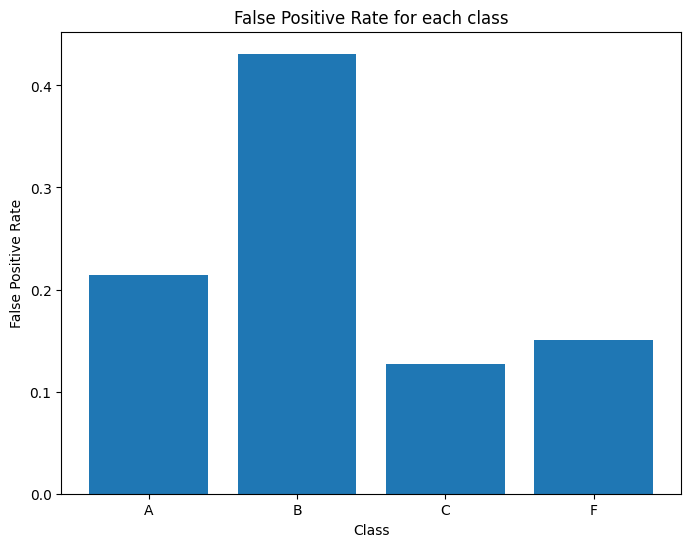

In [ ]:
# Compute False Positive Rate
def calculate_false_positive_rate(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))
    fp_rate = fp / (fp + tn)
    return fp_rate

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Calculate False Positive Rate (FPR)
fp_rate = calculate_false_positive_rate(conf_matrix_test)
print("False Positive Rate for each class:", fp_rate)

# Calculate Macro-average FPR
macro_avg_fpr = np.mean(fp_rate)
print("Macro-average FPR:", macro_avg_fpr)

# Micro-average FPR
total_fp = np.sum(conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test))
total_tn = np.sum(conf_matrix_test.sum() - (conf_matrix_test.sum(axis=0) + conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test)))
micro_avg_fpr = total_fp / (total_fp + total_tn)
print("Micro-average FPR:", micro_avg_fpr)

# Weighted-average FPR
class_counts = np.sum(conf_matrix_test, axis=1)
weighted_avg_fpr = np.sum(fp_rate * class_counts) / np.sum(class_counts)
print("Weighted-average FPR:", weighted_avg_fpr)

# Calculate Logarithmic Loss
log_loss_test = log_loss(y_test, log_reg.predict_proba(x_test))
print("Logarithmic Loss on Test Set:", log_loss_test)

# Visualize False Positive Rate
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(fp_rate)), fp_rate)
plt.xlabel('Class')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for each class')
plt.xticks(np.arange(len(fp_rate)), np.unique(y_test))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = log_reg.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1,)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.34615384615384615
Precision (macro average): 0.2950515796260477
f1_score (macro average): 0.2537281377180901
recall (macro average): 0.2571298884925608


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = log_reg.predict(x_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='macro')
f1 = f1_score(y_train, predictions, average='macro')
recall = recall_score(y_train, predictions, average='macro')

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.4420731707317073
Precision (macro average): 0.43477174188260415
f1_score (macro average): 0.43394112309348903
recall (macro average): 0.4420731707317074


### 4.2 Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=5,random_state= 2022)
clf = clf.fit(x_train, y_train)

y_pred = clf.predict(x_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           A       0.84      0.79      0.82        82
           B       0.64      0.67      0.65        82
           C       0.82      0.38      0.52        82
           F       0.57      0.88      0.69        82

    accuracy                           0.68       328
   macro avg       0.72      0.68      0.67       328
weighted avg       0.72      0.68      0.67       328

[[65  9  0  8]
 [ 6 55  7 14]
 [ 5 13 31 33]
 [ 1  9  0 72]]


In [ ]:
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.12      0.33      0.18         6
           B       0.49      0.46      0.47        46
           C       0.56      0.22      0.32        41
           F       0.14      0.36      0.20        11

    accuracy                           0.35       104
   macro avg       0.33      0.34      0.29       104
weighted avg       0.46      0.35      0.36       104

[[ 2  3  0  1]
 [13 21  4  8]
 [ 1 15  9 16]
 [ 0  4  3  4]]


False Positive Rate for each class: [0.14285714 0.37931034 0.11111111 0.2688172 ]
Macro-average FPR: 0.22552395077422888
Micro-average FPR: 0.21794871794871795
Weighted-average FPR: 0.2482496492507616
Logarithmic Loss on Test Set: 7.124640904502393


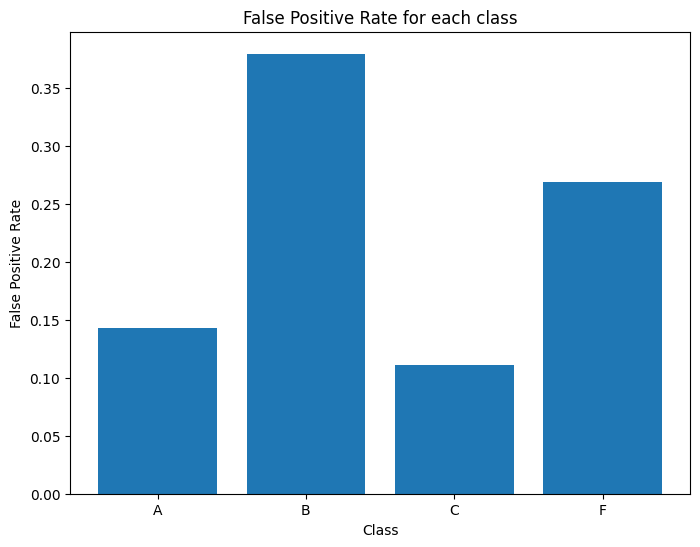

In [ ]:
# Compute False Positive Rate
def calculate_false_positive_rate(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))
    fp_rate = fp / (fp + tn)
    return fp_rate

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Calculate False Positive Rate
fp_rate = calculate_false_positive_rate(conf_matrix_test)
print("False Positive Rate for each class:", fp_rate)

# Calculate Macro-average FPR
macro_avg_fpr = np.mean(fp_rate)
print("Macro-average FPR:", macro_avg_fpr)

# Micro-average FPR
total_fp = np.sum(conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test))
total_tn = np.sum(conf_matrix_test.sum() - (conf_matrix_test.sum(axis=0) + conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test)))
micro_avg_fpr = total_fp / (total_fp + total_tn)
print("Micro-average FPR:", micro_avg_fpr)

# Weighted-average FPR
class_counts = np.sum(conf_matrix_test, axis=1)
weighted_avg_fpr = np.sum(fp_rate * class_counts) / np.sum(class_counts)
print("Weighted-average FPR:", weighted_avg_fpr)

# Calculate Logarithmic Loss
log_loss_test = log_loss(y_test, clf.predict_proba(x_test))
print("Logarithmic Loss on Test Set:", log_loss_test)

# Visualize False Positive Rate
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(fp_rate)), fp_rate)
plt.xlabel('Class')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for each class')
plt.xticks(np.arange(len(fp_rate)), np.unique(y_test))
plt.show()

In [ ]:
# False Positive Rate for testing data
cm_test = confusion_matrix(y_test, y_pred)
fpr_test = np.sum(cm_test - np.diag(np.diag(cm_test))) / (np.sum(cm_test) - np.sum(np.diag(cm_test)))
print("False Positive Rate (Testing Data):", fpr_test)

# Logarithmic Loss for testing data
y_prob_test = clf.predict_proba(x_test)
log_loss_val = log_loss(y_test, y_prob_test)
print("Logarithmic Loss (Testing Data):", log_loss_val)

False Positive Rate (Testing Data): 1.0
Logarithmic Loss (Testing Data): 7.124640904502393


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1,)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.34615384615384615
Precision (macro average): 0.3284507818765036
f1_score (macro average): 0.2923794419654857
recall (macro average): 0.3432509078055207


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf.predict(x_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='macro', zero_division=1)
f1 = f1_score(y_train, predictions, average='macro', zero_division=1)
recall = recall_score(y_train, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.6798780487804879
Precision (macro average): 0.7166023338548131
f1_score (macro average): 0.6695084624081645
recall (macro average): 0.6798780487804877


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    clf,
    out_file = "Anatomy Mark.dot",
    feature_names = ['AGE DURING ADMISSION', 'TOTAL_SEM', 'AVERAGE_CGPA', 'FINAL_CGPA'],
    class_names = ['A','B', 'C', 'F' ],
    rounded= True,
    filled =True)

### 4.3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(max_depth=5,random_state= 2022)
clf1 = clf1.fit(x_train, y_train)

y_pred = clf1.predict(x_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           A       0.83      0.83      0.83        82
           B       0.77      0.62      0.69        82
           C       0.71      0.57      0.64        82
           F       0.65      0.90      0.76        82

    accuracy                           0.73       328
   macro avg       0.74      0.73      0.73       328
weighted avg       0.74      0.73      0.73       328

[[68  3  2  9]
 [ 9 51 13  9]
 [ 5  8 47 22]
 [ 0  4  4 74]]


In [ ]:
y_pred = clf1.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.12      0.33      0.18         6
           B       0.51      0.46      0.48        46
           C       0.52      0.29      0.38        41
           F       0.08      0.18      0.11        11

    accuracy                           0.36       104
   macro avg       0.31      0.32      0.29       104
weighted avg       0.45      0.36      0.38       104

[[ 2  3  0  1]
 [13 21  7  5]
 [ 1 12 12 16]
 [ 0  5  4  2]]


False Positive Rate for each class: [0.14285714 0.34482759 0.17460317 0.23655914]
Macro-average FPR: 0.22471176086304007
Micro-average FPR: 0.21474358974358973
Weighted-average FPR: 0.254616274221391
Logarithmic Loss on Test Set: 1.283209987650138


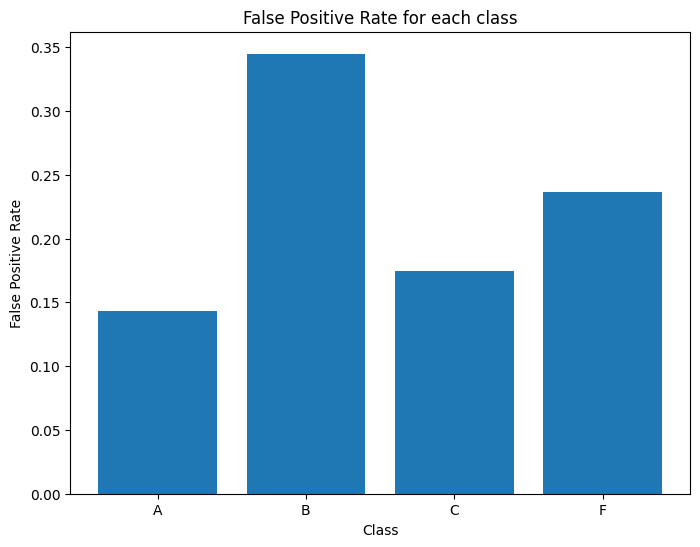

In [ ]:
# Compute False Positive Rate
def calculate_false_positive_rate(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))
    fp_rate = fp / (fp + tn)
    return fp_rate

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Calculate False Positive Rate
fp_rate = calculate_false_positive_rate(conf_matrix_test)
print("False Positive Rate for each class:", fp_rate)

# Calculate Macro-average FPR
macro_avg_fpr = np.mean(fp_rate)
print("Macro-average FPR:", macro_avg_fpr)

# Micro-average FPR
total_fp = np.sum(conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test))
total_tn = np.sum(conf_matrix_test.sum() - (conf_matrix_test.sum(axis=0) + conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test)))
micro_avg_fpr = total_fp / (total_fp + total_tn)
print("Micro-average FPR:", micro_avg_fpr)

# Weighted-average FPR
class_counts = np.sum(conf_matrix_test, axis=1)
weighted_avg_fpr = np.sum(fp_rate * class_counts) / np.sum(class_counts)
print("Weighted-average FPR:", weighted_avg_fpr)

# Calculate Logarithmic Loss
log_loss_test = log_loss(y_test, clf1.predict_proba(x_test))
print("Logarithmic Loss on Test Set:", log_loss_test)

# Visualize False Positive Rate
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(fp_rate)), fp_rate)
plt.xlabel('Class')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for each class')
plt.xticks(np.arange(len(fp_rate)), np.unique(y_test))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf1.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1,)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.3557692307692308
Precision (macro average): 0.31056689642983387
f1_score (macro average): 0.2884656291983878
recall (macro average): 0.31608904527780457


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf1.predict(x_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='macro')
f1 = f1_score(y_train, predictions, average='macro')
recall = recall_score(y_train, predictions, average='macro')

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.7317073170731707
Precision (macro average): 0.7408098961372389
f1_score (macro average): 0.7271736644558944
recall (macro average): 0.7317073170731707


### 4.4 Support Vector Machine (SVM)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf2.fit(x_train, y_train)

y_pred = clf2.predict(x_train)

print(classification_report(y_train, y_pred))
print(confusion_matrix(y_train, y_pred))

              precision    recall  f1-score   support

           A       0.61      0.70      0.65        82
           B       0.52      0.51      0.52        82
           C       0.56      0.23      0.33        82
           F       0.52      0.76      0.61        82

    accuracy                           0.55       328
   macro avg       0.55      0.55      0.53       328
weighted avg       0.55      0.55      0.53       328

[[57 16  2  7]
 [19 42  9 12]
 [ 8 16 19 39]
 [ 9  7  4 62]]


In [ ]:
y_pred = clf2.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.06      0.17      0.09         6
           B       0.43      0.48      0.45        46
           C       0.50      0.12      0.20        41
           F       0.07      0.18      0.11        11

    accuracy                           0.29       104
   macro avg       0.27      0.24      0.21       104
weighted avg       0.40      0.29      0.29       104

[[ 1  4  0  1]
 [13 22  3  8]
 [ 2 18  5 16]
 [ 0  7  2  2]]


False Positive Rate for each class: [0.15306122 0.5        0.07936508 0.2688172 ]
Macro-average FPR: 0.25031087703898763
Micro-average FPR: 0.23717948717948717
Weighted-average FPR: 0.289705046617489
Logarithmic Loss on Test Set: 1.3200716681605846


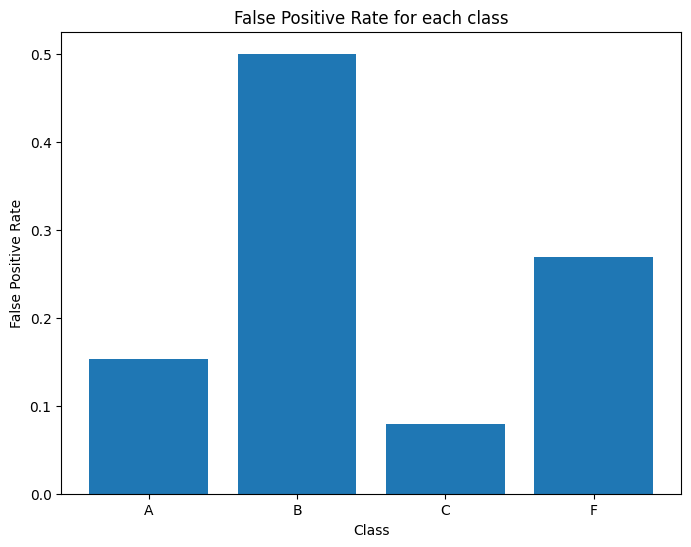

In [ ]:
# Compute False Positive Rate
def calculate_false_positive_rate(conf_matrix):
    fp = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
    tn = conf_matrix.sum() - (conf_matrix.sum(axis=0) + conf_matrix.sum(axis=1) - np.diag(conf_matrix))
    fp_rate = fp / (fp + tn)
    return fp_rate

# Compute confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_pred)

# Calculate False Positive Rate
fp_rate = calculate_false_positive_rate(conf_matrix_test)
print("False Positive Rate for each class:", fp_rate)

# Calculate Macro-average FPR
macro_avg_fpr = np.mean(fp_rate)
print("Macro-average FPR:", macro_avg_fpr)

# Micro-average FPR
total_fp = np.sum(conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test))
total_tn = np.sum(conf_matrix_test.sum() - (conf_matrix_test.sum(axis=0) + conf_matrix_test.sum(axis=1) - np.diag(conf_matrix_test)))
micro_avg_fpr = total_fp / (total_fp + total_tn)
print("Micro-average FPR:", micro_avg_fpr)

# Weighted-average FPR
class_counts = np.sum(conf_matrix_test, axis=1)
weighted_avg_fpr = np.sum(fp_rate * class_counts) / np.sum(class_counts)
print("Weighted-average FPR:", weighted_avg_fpr)

# Calculate decision scores for each class
decision_scores = clf2.decision_function(x_test)

# Convert decision scores into probabilities using Platt scaling
from sklearn.calibration import CalibratedClassifierCV

calibrated_clf = CalibratedClassifierCV(clf2, method='sigmoid')
calibrated_clf.fit(x_train, y_train)
probabilities = calibrated_clf.predict_proba(x_test)

# Calculate Logarithmic Loss
log_loss_test = log_loss(y_test, probabilities)
print("Logarithmic Loss on Test Set:", log_loss_test)

# Visualize False Positive Rate
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(fp_rate)), fp_rate)
plt.xlabel('Class')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate for each class')
plt.xticks(np.arange(len(fp_rate)), np.unique(y_test))
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf2.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro', zero_division=1,)
f1 = f1_score(y_test, predictions, average='macro', zero_division=1)
recall = recall_score(y_test, predictions, average='macro', zero_division=1)

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.28846153846153844
Precision (macro average): 0.2669866557734205
f1_score (macro average): 0.21146473189976428
recall (macro average): 0.23717423439056523


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score



predictions = clf2.predict(x_train)

accuracy = accuracy_score(y_train, predictions)
precision = precision_score(y_train, predictions, average='macro')
f1 = f1_score(y_train, predictions, average='macro')
recall = recall_score(y_train, predictions, average='macro')

print("Acurracy (macro average):", accuracy)
print("Precision (macro average):", precision)
print("f1_score (macro average):", f1)
print("recall (macro average):", recall)

Acurracy (macro average): 0.5487804878048781
Precision (macro average): 0.5517279851008504
f1_score (macro average): 0.5270533969441551
recall (macro average): 0.5487804878048781
